# Tarea 2

In [2]:
#Importacion de librerias
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True) 
%matplotlib notebook
#%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

1.**Estabilidad I:** Usando el código de clase, estudie la estabilidad de los algoritmo Runge-kutta de tercer y cuarto orden. Realice las graficas y suposiciones que considere necesarias.

In [102]:
def fc(z):
    return 1j*z

In [103]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [109]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [110]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)

In [146]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4 = fc(f+k3*h_)
    
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)

In [140]:
theta = 0.

N = 18
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [147]:
theta = 0.
f=1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

In [148]:
theta = 0.
f=1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

In [149]:
theta = 0.
f=1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

<IPython.core.display.Javascript object>


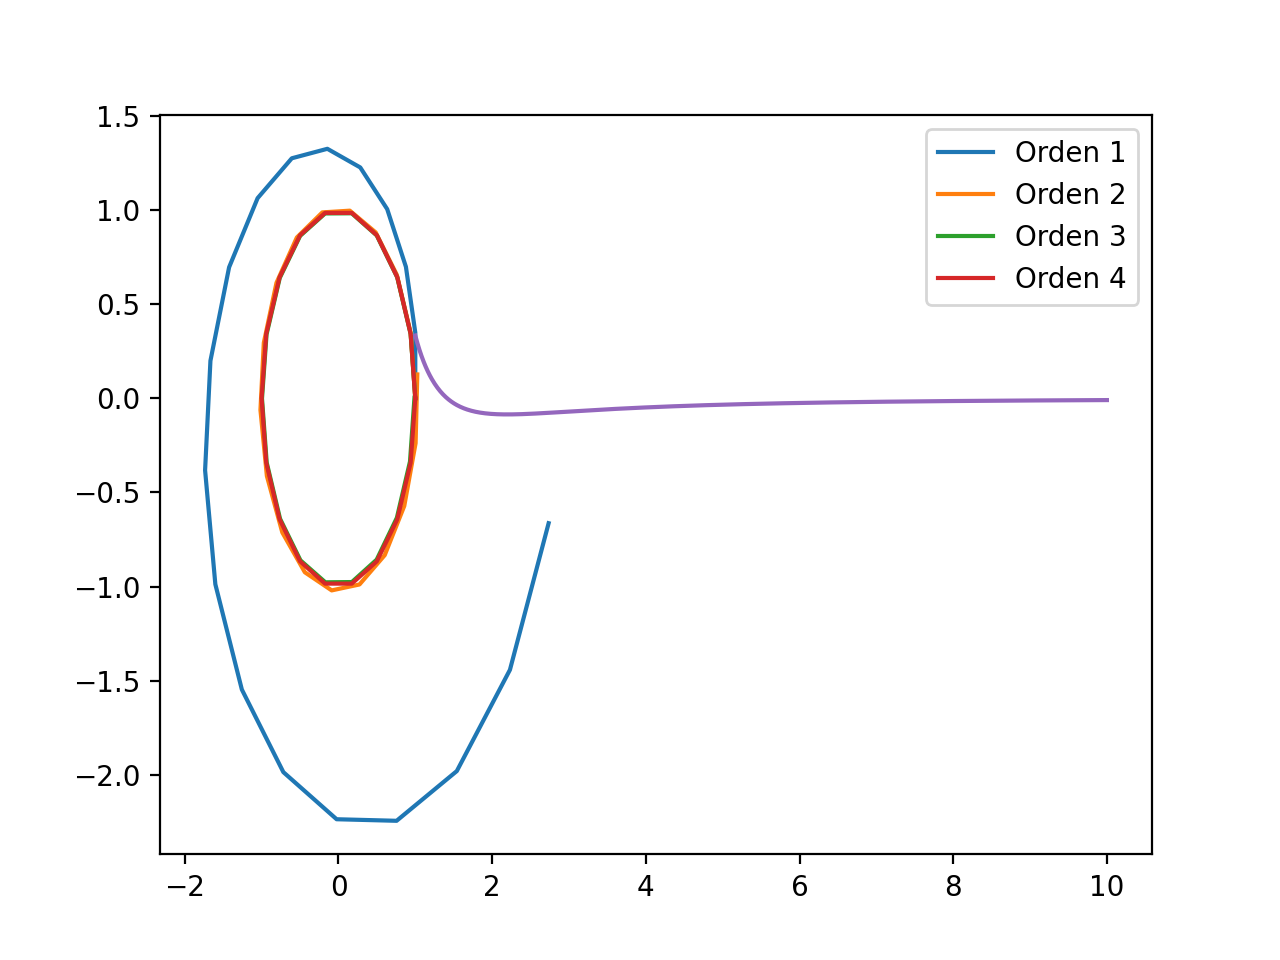

In [152]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])


plt.plot(Re,Im,label="Orden 1")
plt.plot(Re2,Im2,label="Orden 2")
plt.plot(Re3,Im3,label="Orden 3")
plt.plot(Re4,Im4,label="Orden 4")
plt.legend(loc='upper right')

2. **Estabilidad II:** Para el algoritmo de Verlet:

a) Muestre que el error del método está descrito por:

b) Para el caso de un oscilador armónico clásico muestre que:

c) Usando la suposición de función potencia $\epsilon_n = \epsilon_0\lambda^n$, muestre que las raíces son:

d)

e)

3) Resolver analíticamente la ecuación diferencial de Riccati:
$$x^3y'=x^4y^2-2x^2y-1$$
Una solución particular esta dada por: $y_1 = x^{−2}$. Encuentre numéricamente la solución usando alguno de los métodos vistos en clase con la condición inicial $y(\sqrt{2}) = 0$.


**Parte Analítica**
$$x^3y'=x^4y^2-2x^2y-1$$
$$y'=xy^2-2x^{-1}y-x^{-3}$$
Tomando la solución de la particular, queremos que nuestra ecuación sea:
$$y = y_1 + \frac{1}{u}$$
Lo cual al derivar tenemos 
$$y' = x(x^{-2})^2-2x^{-1}(x^{-2})-x^{-3} - \frac{1}{u^2}u'$$
$$y' = x^{-3}-2x^{-3}-x^{-3} - \frac{1}{u^2}u'$$
$$y' = -2x^{-3} - \frac{1}{u^2}u'$$
$$xy^2-2x^{-1}y= -x^{-3} - \frac{1}{u^2}u'$$
$$-\frac{1}{u^2}u'=+xy^2-2x^{-1}y +x^{-3} $$
Remplazamos los valores de y con $y = x^{-2} + \frac{1}{u}$
$$-\frac{1}{u^2}u'=+x(x^{-2} + \frac{1}{u})^2-2x^{-1}(x^{-2} + \frac{1}{u}) +x^{-3} $$
$$-\frac{1}{u^2}u'=x^{-3}+2x^{-2}u^{-1}+u^{-2}-2x^{-3}-2x^{-1}u^{-1}+x^{-3} $$
$$-\frac{1}{u^2}u'=\frac{2}{xu}+\frac{x}{u^2}-2\frac{2}{xu}$$
$$u'=-x$$
Entonces, 
$$u = \int -x d x$$
$$u = -\frac{x^2}{2}+c$$
Lo cual la solución es, $$y = x^{-2} + \frac{1}{-\frac{x^2}{2}+c}$$

Con las condiciones iniciales tenemos que 
$$0 = \frac{1}{2} + \frac{1}{-1+c}$$
$$ -\frac{1}{2}(-1+c) = 1$$
$$c = -1 $$

In [219]:
N = 100
t = np.linspace(2**(1/2),10,N)

In [220]:
def solucion(t):
    return t**(-2)+(1/(-(t**2/2+1)))

In [221]:
def Ricatti(x,y):
    return x*y**2-2*x**(-1)*y-x**(-3)

In [226]:
def Euler4(t,y0,f):
    h = t[1]-t[0]
    y = np.zeros_like(t)
    y[0] = y0
    for i in range (1, len(y)):
        k1 = f(t[i-1],y[i-1])
        k2 = f(t[i-1]+0.5*h,y[i-1]+0.5*k1*h)
        k3 = f(t[i-1]+0.5*h,y[i-1]+0.5*k2*h)
        k4 = f(t[i-1]+h,y[i-1]+k3*h)
        y[i] = y[i-1]+(h/6)*(k1+2*k2+2*k3+k4)
    return y 

<IPython.core.display.Javascript object>


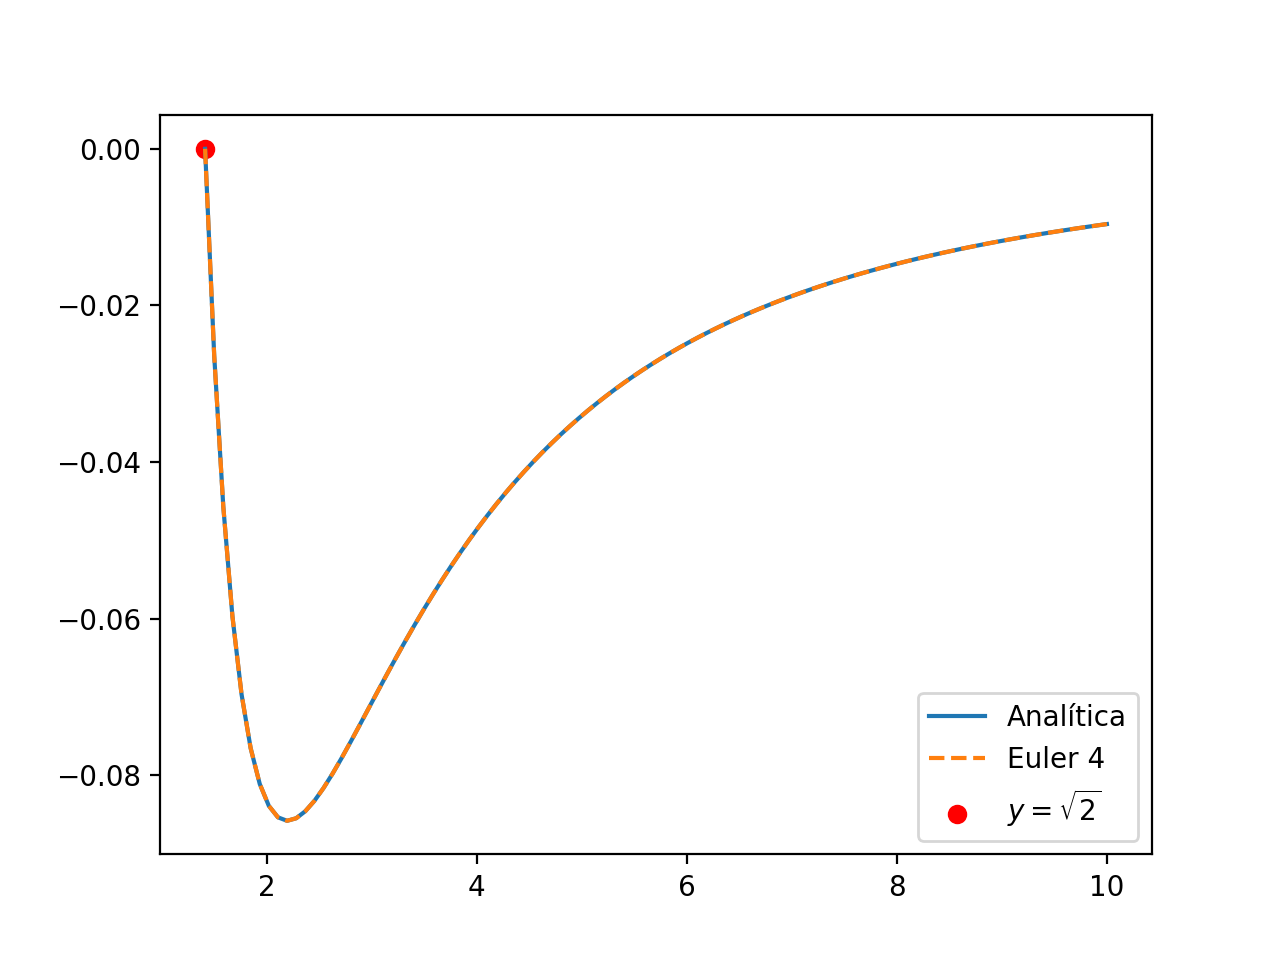

In [229]:
plt.plot(t,solucion(t), label = "Analítica")
plt.plot(t,Euler4(t,0,Ricatti), linestyle='dashed',label = "Euler 4")
plt.scatter(np.sqrt(2),solucion(np.sqrt(2)), color="red",label=r'$y \sqrt{2}$')
plt.legend()